# *Lab 03: VGG*



### 1. Hãy dùng thư viện keras.layers để cài đặt VGG19 huấn luyện trên bộ dữ liệu cifar-10

### Init

In [ ]:
#import các thư viện
import keras
from keras import backend as k
import tensorflow as tf
import cv2
import numpy as np
#chọn hệ số lamda
regularizer=0.0005

### Load dataset

In [ ]:
## tải CIFAR-100 dataset từ keras
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
##resacle ảnh thành ảnh thực trong đoạn [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

## Resize toàn bộ ảnh train tập train và test
X_train = [cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY) for img in X_train]
X_test = [cv2.cvtColor(np.float32(img), cv2.COLOR_BGR2GRAY) for img in X_test]

X_train = np.array([cv2.resize(img, dsize=(32,32)) for img in X_train])
X_test = np.array([cv2.resize(img, dsize=(32,32)) for img in X_test])

print("Kích thước tập sau khi resize: ", X_train.shape, X_test.shape)

#Tách một phần tập train thành tập valid
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2)

Kích thước tập sau khi resize:  (50000, 32, 32) (10000, 32, 32)


In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

#Cấu trúc mô hình

In [ ]:
### So sánh với hàm keras 

vgg19 = keras.applications.vgg19.VGG19(include_top=True, 
                                       weights=None, 
                                       input_tensor=None, 
                                       input_shape=(32,32,1), 
                                       pooling='max',
                                       classes=10)
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        640       
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
#Khởi tạo mô hình
def Init_Model(regularizer):
  model=keras.Sequential()

  #phải reshape lại input theo đúng (?,A,B,C)
  model.add(keras.layers.Reshape((32,32,1),input_shape=(32,32)))

  #block1
  #Gồm 2 lớp Convolution và 1 lớp maxpooling pool_size là 2x2
  #filter 64, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=64,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=64,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding='same',
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                  strides=[2,2]))

  #block2
  #Gồm 2 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
  #filter 128, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=128,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=128,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                      strides=[2,2]))

  #block3
  #Gồm 3 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
  #filter 256, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=256,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=256,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=256,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=256,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                            strides=[2,2]))
  #block4
  #Gồm 3 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
  #filter 512, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                  strides=[2,2]))
  #block5
  #Gồm 4 lớp Convolution và 1 lớp maxpooling với pool_size là 2x2
  #filter 512, kernel_size là 3x3 và stride 1x1, có padding, activation là relu
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.Convolution2D(filters=512,
                                      kernel_size=[3,3],
                                      strides=[1,1],
                                      padding="same",
                                      activation=keras.activations.relu))
  model.add(keras.layers.MaxPool2D(pool_size=[2,2],
                                  strides=[2,2]))


  #block 6
  #Gồm lớp Flatten để duỗi ra
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(units=4096,
                              activation=keras.activations.relu,
                              kernel_regularizer=keras.regularizers.l2(regularizer)))
  model.add(keras.layers.Dropout(rate=0.5))

  model.add(keras.layers.Dense(units=4096,
                              activation=keras.activations.relu,
                              kernel_regularizer=keras.regularizers.l2(regularizer)))
  model.add(keras.layers.Dropout(rate=0.5))

  model.add(keras.layers.Dense(units=10,
                              activation=keras.activations.softmax))
  model.add(keras.layers.Dropout(rate=0.5))

  return model


model = Init_Model(regularizer=0.0005)
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=100),    ##tự khai báo Optimizer với learning rate 10^-4
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

In [ ]:
### Training 
mc = keras.callbacks.ModelCheckpoint(filepath="vgg19_mnist.h5", 
                                     monitor='val_loss',
                                     mode='min', 
                                     verbose=0, 
                                     save_best_only=True)

## Train  ## Khuyến cáo chạy COLAB (hoặc tương tự)
history = model.fit(X_train, y_train,
                    batch_size=256,
                    epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[mc])                     ##sử dụng callback ModelCheckpoint trong quá trình train


## Đánh giá model trên tập test
valid_loss, valid_acc = model.evaluate(X_valid, y_valid)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Valid: loss {} acc {} -- Test: loss {} valid {}".format(valid_loss, valid_acc, test_loss, test_acc))

## Load lại model tốt nhất đã lưu
print("best model: ")
model.load_weights("vgg19_mnist.h5")
valid_loss, valid_acc = model.evaluate(X_valid, y_valid)
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Valid: loss {} acc {} -- Test: loss {} acc {}".format(valid_loss, valid_acc, test_loss, test_acc))

Epoch 1/10
157/157 [==============================] - 21s 132ms/step - loss: 1654199.2500 - accuracy: 0.0999 - val_loss: 16.9582 - val_accuracy: 0.1040
Epoch 2/10
157/157 [==============================] - 21s 131ms/step - loss: 8.6016 - accuracy: 0.1009 - val_loss: 14.4418 - val_accuracy: 0.1040
Epoch 3/10
157/157 [==============================] - 19s 120ms/step - loss: 8.4145 - accuracy: 0.0992 - val_loss: 14.4418 - val_accuracy: 0.1040
Epoch 4/10
157/157 [==============================] - 19s 119ms/step - loss: 8.4333 - accuracy: 0.1006 - val_loss: 14.4418 - val_accuracy: 0.1040
Epoch 5/10
157/157 [==============================] - 19s 119ms/step - loss: 8.3833 - accuracy: 0.0995 - val_loss: 14.4518 - val_accuracy: 0.1040
Epoch 6/10
157/157 [==============================] - 19s 120ms/step - loss: 9.2792 - accuracy: 0.1001 - val_loss: 17.6474 - val_accuracy: 0.1040
Epoch 7/10
157/157 [==============================] - 19s 121ms/step - loss: 24606.6113 - accuracy: 0.0994 - val_loss:

### 2. Chỉnh các tham số (lrn_rate, l2 weight decay, epochs, batch_size) và nhận xét performance sẽ thay đổi như thế nào 


### Learning rate

In [ ]:
t = 0.001
t_array1 = []
lr_acc =[]

for i in range (1, 3):
  t = t*0.1
  model = Init_Model(regularizer=0.0005)
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=t),    ##tự khai báo Optimizer với learning rate 10^-4
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])
  
  ## Train  ## Khuyến cáo chạy COLAB (hoặc tương tự)
  history = model.fit(X_train, y_train,
                      batch_size=256,
                      epochs=10,
                      validation_data=(X_valid, y_valid),
                      callbacks=[mc])                     ##sử dụng callback ModelCheckpoint trong quá trình train

  t_array1.append(t)
  lr_acc.append(model.evaluate(X_test, y_test))

Epoch 1/10
157/157 [==============================] - 22s 139ms/step - loss: 9.9976 - accuracy: 0.0996 - val_loss: 2.7251 - val_accuracy: 0.0937
Epoch 2/10
157/157 [==============================] - 19s 123ms/step - loss: 8.6553 - accuracy: 0.0997 - val_loss: 14.5679 - val_accuracy: 0.1020
Epoch 3/10
157/157 [==============================] - 19s 124ms/step - loss: 8.4047 - accuracy: 0.1000 - val_loss: 14.5042 - val_accuracy: 0.1020
Epoch 4/10
157/157 [==============================] - 20s 124ms/step - loss: 8.4183 - accuracy: 0.1010 - val_loss: 14.4878 - val_accuracy: 0.1020
Epoch 5/10
157/157 [==============================] - 19s 124ms/step - loss: 8.3769 - accuracy: 0.1000 - val_loss: 14.4813 - val_accuracy: 0.1020
Epoch 6/10
157/157 [==============================] - 19s 124ms/step - loss: 8.4404 - accuracy: 0.1001 - val_loss: 14.4780 - val_accuracy: 0.1020
Epoch 7/10
157/157 [==============================] - 20s 124ms/step - loss: 8.3808 - accuracy: 0.0998 - val_loss: 14.4762 - 

### l2 weight decay

In [ ]:
t = 0.005
t_array2 = []
l2_weight =[]

for i in range (1, 3):
  t = t*0.1
  model = Init_Model(regularizer=t)
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),    ##tự khai báo Optimizer với learning rate 10^-4
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])
  
  ## Train  ## Khuyến cáo chạy COLAB (hoặc tương tự)
  history = model.fit(X_train, y_train,
                      batch_size=256,
                      epochs=10,
                      validation_data=(X_valid, y_valid),
                      callbacks=[mc])                     ##sử dụng callback ModelCheckpoint trong quá trình train
  
  t_array2.append(t)
  l2_weight.append(model.evaluate(X_test, y_test))

Epoch 1/10
157/157 [==============================] - 21s 131ms/step - loss: 9.9457 - accuracy: 0.1001 - val_loss: 2.7607 - val_accuracy: 0.1003
Epoch 2/10
157/157 [==============================] - 21s 136ms/step - loss: 8.9827 - accuracy: 0.1008 - val_loss: 2.3751 - val_accuracy: 0.1003
Epoch 3/10
157/157 [==============================] - 21s 137ms/step - loss: 8.7358 - accuracy: 0.1002 - val_loss: 2.3135 - val_accuracy: 0.0968
Epoch 4/10
157/157 [==============================] - 21s 136ms/step - loss: 8.7548 - accuracy: 0.1008 - val_loss: 2.3074 - val_accuracy: 0.0994
Epoch 5/10
157/157 [==============================] - 21s 135ms/step - loss: 8.7660 - accuracy: 0.0988 - val_loss: 2.3038 - val_accuracy: 0.0937
Epoch 6/10
157/157 [==============================] - 21s 135ms/step - loss: 8.8041 - accuracy: 0.0999 - val_loss: 2.3031 - val_accuracy: 0.0937
Epoch 7/10
157/157 [==============================] - 21s 134ms/step - loss: 8.7766 - accuracy: 0.1005 - val_loss: 2.3029 - val_ac

### Epochs

In [ ]:
t_array3 = []
t = 1
ep =[]

for i in range (1, 3):
  t = t+10
  model = Init_Model(regularizer=0.0005)
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),    ##tự khai báo Optimizer với learning rate 10^-4
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])
  
  ## Train  ## Khuyến cáo chạy COLAB (hoặc tương tự)
  history = model.fit(X_train, y_train,
                      batch_size=256,
                      epochs=t,
                      validation_data=(X_valid, y_valid),
                      callbacks=[mc])                     ##sử dụng callback ModelCheckpoint trong quá trình train

  t_array3.append(t)
  ep.append(model.evaluate(X_test, y_test))

Epoch 1/11
157/157 [==============================] - 21s 131ms/step - loss: 10.0064 - accuracy: 0.1010 - val_loss: 2.7199 - val_accuracy: 0.0937
Epoch 2/11
157/157 [==============================] - 20s 129ms/step - loss: 8.9254 - accuracy: 0.1009 - val_loss: 2.3672 - val_accuracy: 0.1003
Epoch 3/11
157/157 [==============================] - 20s 128ms/step - loss: 8.8632 - accuracy: 0.1003 - val_loss: 2.3125 - val_accuracy: 0.0968
Epoch 4/11
157/157 [==============================] - 20s 127ms/step - loss: 8.7578 - accuracy: 0.1006 - val_loss: 2.3046 - val_accuracy: 0.0968
Epoch 5/11
157/157 [==============================] - 20s 128ms/step - loss: 8.8244 - accuracy: 0.1001 - val_loss: 2.3033 - val_accuracy: 0.1003
Epoch 6/11
157/157 [==============================] - 20s 128ms/step - loss: 8.7581 - accuracy: 0.1008 - val_loss: 2.3031 - val_accuracy: 0.0968
Epoch 7/11
157/157 [==============================] - 20s 128ms/step - loss: 8.8068 - accuracy: 0.1014 - val_loss: 2.3031 - val_a

### Batch size

In [ ]:
t = 128
t_array4 = []
batch =[]

for i in range (1, 3):
  t = t*2
  model = Init_Model(regularizer=0.0005)
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),    ##tự khai báo Optimizer với learning rate 10^-4
             loss=tf.keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])
  
  ## Train  ## Khuyến cáo chạy COLAB (hoặc tương tự)
  history = model.fit(X_train, y_train,
                      batch_size=t,
                      epochs=10,
                      validation_data=(X_valid, y_valid),
                      callbacks=[mc])                     ##sử dụng callback ModelCheckpoint trong quá trình train

  t_array4.append(t)
  batch.append(model.evaluate(X_test, y_test))

Epoch 1/10
157/157 [==============================] - 20s 130ms/step - loss: 10.0065 - accuracy: 0.1002 - val_loss: 2.8062 - val_accuracy: 0.0968
Epoch 2/10
157/157 [==============================] - 20s 128ms/step - loss: 8.9902 - accuracy: 0.0986 - val_loss: 2.4067 - val_accuracy: 0.0994
Epoch 3/10
157/157 [==============================] - 20s 128ms/step - loss: 8.8080 - accuracy: 0.1018 - val_loss: 2.3279 - val_accuracy: 0.0994
Epoch 4/10
157/157 [==============================] - 20s 128ms/step - loss: 8.8490 - accuracy: 0.0993 - val_loss: 2.3105 - val_accuracy: 0.0937
Epoch 5/10
157/157 [==============================] - 20s 128ms/step - loss: 8.8097 - accuracy: 0.0991 - val_loss: 2.3056 - val_accuracy: 0.0937
Epoch 6/10
157/157 [==============================] - 20s 128ms/step - loss: 8.7855 - accuracy: 0.1015 - val_loss: 2.3039 - val_accuracy: 0.0937
Epoch 7/10
157/157 [==============================] - 20s 128ms/step - loss: 8.8138 - accuracy: 0.1007 - val_loss: 2.3032 - val_a

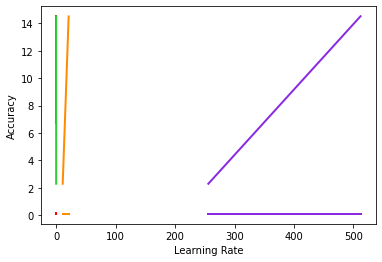

In [ ]:
import matplotlib.pyplot as plt

setup1 = plt.plot(t_array1, lr_acc)
setup2 = plt.plot(t_array2, l2_weight)
setup3 = plt.plot(t_array3, ep)
setup4 = plt.plot(t_array4, batch)

plt.setp(setup1, color='r', linewidth=2.0)
plt.setp(setup2, color='limegreen', linewidth=2.0)
plt.setp(setup3, color='darkorange', linewidth=2.0)
plt.setp(setup4, color='blueviolet', linewidth=2.0)

plt.ylabel('Accuracy')
plt.xlabel('Learning Rate')
plt.show()

### Nhận xét

(Khúc này mình không chắc đúng 100%)



*   Khi thay đổi learning rate: Khi tăng learning rate, tốc độ thay đổi của accuracy mỗi epoch thay đổi nhanh chóng, sớm converge hơn.

*   Khi thay đổi l2 weight decay:  Khi tăng thông số này, giá trị hàm loss tăng lên nhanh mỗi epoch, accuracy tăng không nhiều.

*   Khi thay đổi epoch:  Khi tăng số epoch, accuracy cũng tăng theo

*   Khi thay đổi batch size: Khi tăng hoặc giảm thông số này, accuracy khó lường trước, nhưng với dataset này thì có xu hướng tăng.

